<a href="https://colab.research.google.com/github/Paulin178/Machine-Learning/blob/main/Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-4-2331176c51dd>:44: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='ward')


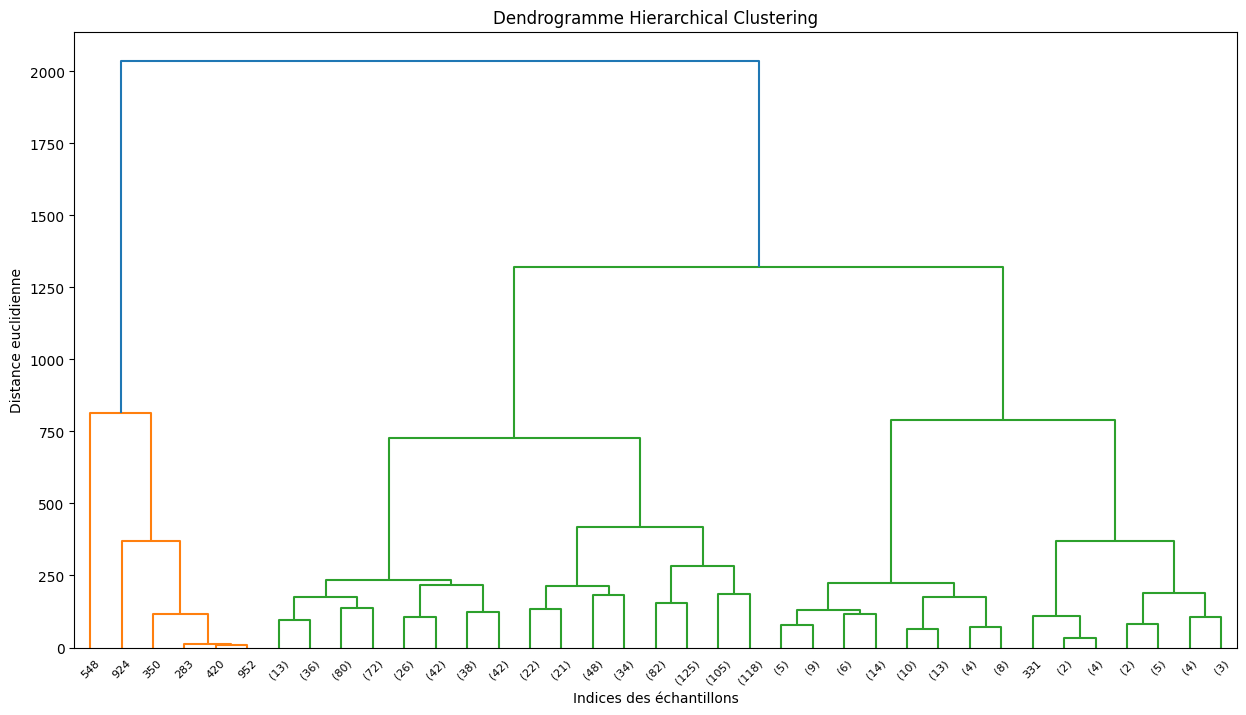

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

# Chargement des données à partir du fichier CSV
data = pd.read_csv('clear_data.csv')

# Sélection des colonnes pertinentes dans notre fichier CSV
selected_columns = ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
                    'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud', 'isFraud']

# Filtrer le DataFrame pour les colonnes sélectionnées
data = data[selected_columns]

# Supprimer les lignes contenant des valeurs manquantes
data.dropna(inplace=True)

# Encodage des variables catégorielles avec LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['type', 'nameOrig', 'nameDest']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Sélectionner un sous-ensemble des données pour réduire la taille
sample_size = 1000
data_sample = data.sample(n=sample_size, random_state=42)

# Séparation des caractéristiques (X)
X = data_sample

# Mise à l'échelle des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calcul des distances pairwise
distances = pdist(X_scaled)

# Conversion des distances en une matrice de distance carrée
distance_matrix = squareform(distances)

# Création de la matrice de liaison (linkage matrix) avec la méthode de liaison 'ward'
linkage_matrix = linkage(distance_matrix, method='ward')

# Affichage du dendrogramme
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Dendrogramme Hierarchical Clustering')
plt.xlabel('Indices des échantillons')
plt.ylabel('Distance euclidienne')
plt.show()
